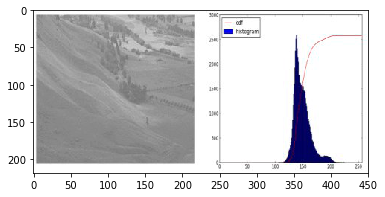

In [43]:
from scipy import ndimage
import cv2
from scipy import misc

from PIL import Image
import numpy as np
%matplotlib inline

image = cv2.imread('./pic.png')
img = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)


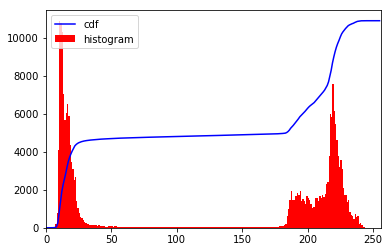

In [48]:


hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * float(hist.max()) / cdf.max()
plt.plot(cdf_normalized, color = 'b')
plt.hist(img.flatten(),256,[0,256], color = 'r')
plt.xlim([0,256])
plt.legend(('cdf','histogram'), loc = 'upper left')
plt.show()



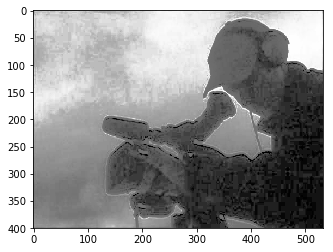

In [49]:
cdf_m = np.ma.masked_equal(cdf,0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max()-cdf_m.min())
cdf = np.ma.filled(cdf_m,0).astype('uint8')

img2 = cdf[img]
plt.imshow(img2, cmap="gray")
plt.show()

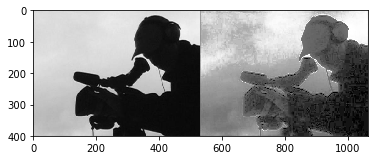

In [52]:
equ = cv2.equalizeHist(img)
res = np.hstack((img,equ)) 
plt.imshow(res,cmap="gray")
plt.show()

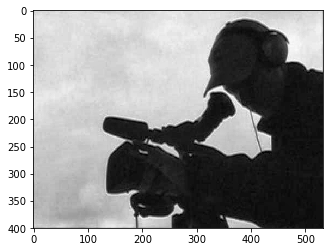

In [56]:

 

clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(img)
plt.imshow(cl1, cmap="gray")
plt.show()